1.Mounting Google Drive

2.Load data

In [ ]:
import pandas as pd

# **ACTION REQUIRED:** Update the file_path variable below with the correct path to your CSV file in Google Drive.
# You can get the path by navigating to the file in the file explorer on the left, right-clicking it, and selecting 'Copy path'.
file_path = '/content/drive/My Drive/Sleep_health_and_lifestyle_dataset.csv' # Replace with your actual path
df = pd.read_csv(file_path)

# Display the first 5 rows to confirm the data is loaded
display(df.head())

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Sleep_health_and_lifestyle_dataset.csv'

3.Installing TensorFlow & Importing Deep Learning Libraries

In [ ]:
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler


4.📊 Data Loading, Preprocessing, and Train-Test Split for Sleep Disorder Classification

In [ ]:
# 📚 Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 🔗 Load dataset from Google Drive (Update path if in a folder)
file_path = '/content/drive/My Drive/Sleep_health_and_lifestyle_dataset.csv'
df = pd.read_csv(file_path)

# 👀 Preview the data
print("🔍 First 5 rows:")
print(df.head())

# 🧼 Check for missing values
print("\n📉 Missing Values:")
print(df.isnull().sum())

# 🎯 Encode categorical columns: Gender, Occupation, Sleep Disorder, BMI Category
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])          # Male=1, Female=0
df['Occupation'] = le.fit_transform(df['Occupation'])  # Encoded as 0,1,...
df['Sleep Disorder'] = le.fit_transform(df['Sleep Disorder'].astype(str))  # None=1, Apnea=2, Insomnia=3
df['BMI Category'] = le.fit_transform(df['BMI Category']) # Encoded as 0,1,...

# Split 'Blood Pressure' into two numerical columns and convert to numeric
df[['Systolic Blood Pressure', 'Diastolic Blood Pressure']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic Blood Pressure'] = pd.to_numeric(df['Systolic Blood Pressure'])
df['Diastolic Blood Pressure'] = pd.to_numeric(df['Diastolic Blood Pressure'])

# Drop the original 'Blood Pressure' column
df = df.drop('Blood Pressure', axis=1)


# 📊 Separate features and target
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

# 🧪 Split into Train and Test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ✅ Final output
print("\n✅ Data is Preprocessed!")
print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Sleep_health_and_lifestyle_dataset.csv'

5.⚖️ Feature Scaling using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


6.🔢 Target Class Distribution Check

In [ ]:
print(y.value_counts())


Sleep Disorder
2    219
1     78
0     77
Name: count, dtype: int64


7.Random Forest Classification with Accuracy and Performance Metrics

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9026548672566371
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        24
           1       0.91      0.74      0.82        27
           2       0.95      0.98      0.97        62

    accuracy                           0.90       113
   macro avg       0.88      0.87      0.87       113
weighted avg       0.91      0.90      0.90       113



8.Sleep Disorder Classification Using Deep Neural Networks with SMOTE and Feature Engineering

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/32
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 337ms/step - accuracy: 0.4656 - loss: 1.3337 - val_accuracy: 0.7391 - val_loss: 0.9038
Epoch 2/32
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7421 - loss: 0.6915 - val_accuracy: 0.8696 - val_loss: 0.7611
Epoch 3/32
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8746 - loss: 0.4697 - val_accuracy: 0.8913 - val_loss: 0.6716
Epoch 4/32
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8438 - loss: 0.4839 - val_accuracy: 0.8913 - val_loss: 0.6047
Epoch 5/32
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8582 - loss: 0.4801 - val_accuracy: 0.9348 - val_loss: 0.5546
Epoch 6/32
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8638 - loss: 0.4497 - val_accuracy: 0.9348 - val_loss: 0.5109
Epoch 7/32
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8823 - loss: 0.4146 - val_accuracy: 0.9348 - val_loss: 0.4768
Epoch 8/32
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8886 - loss: 0.3981 - val_accuracy: 0.9239 - 

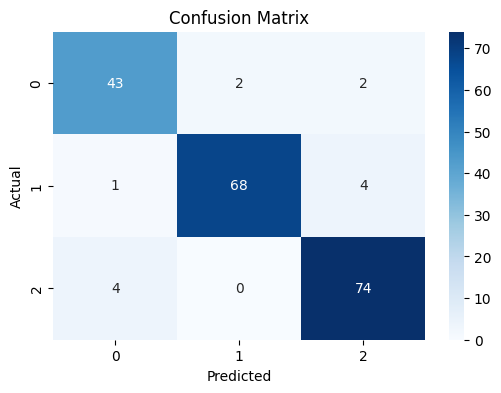

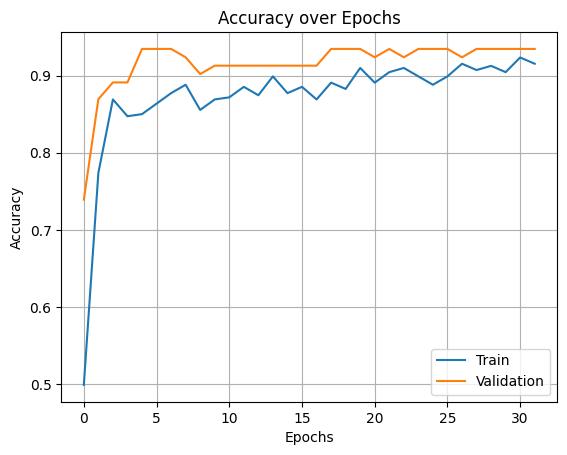

In [ ]:
# 📚 Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import random

# 🔒 Fix randomness
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# 📥 Load Data
# Update the file path to the correct location in Google Drive
file_path = '/content/drive/My Drive/Sleep_health_and_lifestyle_dataset.csv'
df = pd.read_csv(file_path)

# 🧼 Clean & Encode
le = LabelEncoder()
for col in ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']:
    df[col] = le.fit_transform(df[col].astype(str))

# ➗ Blood Pressure
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic BP'] = pd.to_numeric(df['Systolic BP'])
df['Diastolic BP'] = pd.to_numeric(df['Diastolic BP'])
df.drop('Blood Pressure', axis=1, inplace=True)

# 🧠 Feature Engineering
df['Activity_Sleep_Ratio'] = df['Daily Steps'] / df['Sleep Duration']
df['Stress_Sleep_Ratio'] = df['Stress Level'] / df['Sleep Duration']

# 🎯 Features and Target
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

# ⚖️ Class Balance - SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# 🔬 Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

# 🧠 One-hot Encode Labels
y_cat = to_categorical(y_res)

# 🔀 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.3, random_state=42)

# 🏗️ Neural Network
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(y_cat.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ⏱️ Train
history = model.fit(X_train, y_train, validation_split=0.2, epochs=32, batch_size=32, verbose=1)

# ✅ Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.4f}")

# 📊 Predict & Report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes))


# 🔲 Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_true, y_pred_classes), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 📈 Accuracy Curve
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import joblib

# Save the trained scaler to a file named "scaler.pkl"
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [ ]:
# prompt: save the model

model_save_path = '/content/drive/My Drive/sleep_disorder_model.h5' # Or .keras for Keras 3+
model.save(model_save_path)

print(f"Model saved successfully to: {model_save_path}")

Model saved successfully to: /content/drive/My Drive/sleep_disorder_model.h5


9.Sleep Disorder Prediction Using Deep Neural Networks with Early Stopping and Feature Engineering

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - accuracy: 0.4019 - loss: 1.4540 - val_accuracy: 0.7736 - val_loss: 0.9833 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5765 - loss: 0.9127 - val_accuracy: 0.8679 - val_loss: 0.8305 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7951 - loss: 0.5805 - val_accuracy: 0.8491 - val_loss: 0.7066 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8064 - loss: 0.5655 - val_accuracy: 0.8868 - val_loss: 0.6163 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8628 - loss: 0.4239 - val_accuracy: 0.8868 - val_loss: 0.5483 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8586 - loss: 0.4319 - val_accuracy: 0.8868 - val_loss: 0.4965 - learning_rate: 0.0010
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8578 - loss: 0.4192 - val_accuracy: 0.886

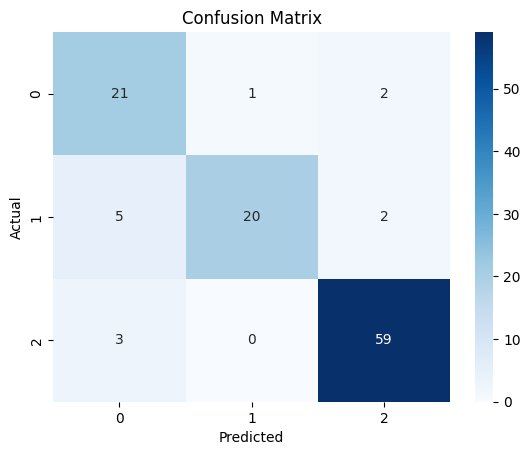

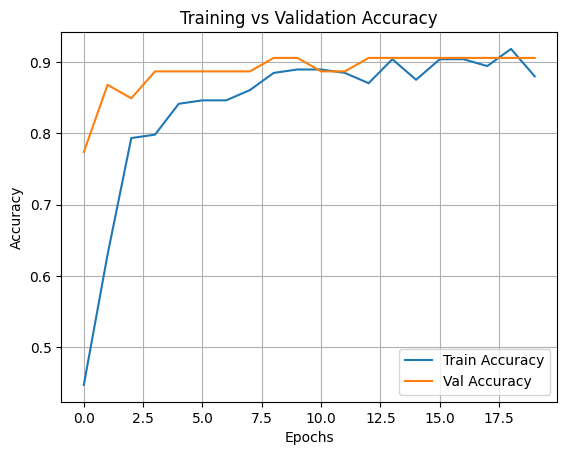

In [ ]:
# 📚 Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Load Data
df = pd.read_csv('/content/drive/My Drive/Sleep_health_and_lifestyle_dataset.csv')

# 🧼 Preprocessing
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['BMI Category'] = le.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = le.fit_transform(df['Sleep Disorder'].astype(str))  # Target

# Blood Pressure
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic BP'] = pd.to_numeric(df['Systolic BP'])
df['Diastolic BP'] = pd.to_numeric(df['Diastolic BP'])
df.drop('Blood Pressure', axis=1, inplace=True)

# Feature Engineering
df['Activity_Sleep_Ratio'] = df['Daily Steps'] / df['Sleep Duration']
df['Stress_Sleep_Ratio'] = df['Stress Level'] / df['Sleep Duration']

# Features and Target
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode target
y_cat = to_categorical(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=42)

# 🧠 Improved Neural Network Model
model = Sequential()
model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(y_cat.shape[1], activation='softmax'))

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ⏱️ Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# 🚀 Train Model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# 📊 Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.4f}")

# 🧾 Classification Report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

# 🔲 Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 📈 Accuracy Curve
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


10.Sleep Disorder Classification Using CatBoost with Feature Engineering and Evaluation Metrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.9 MB/s eta 0:00:00

✅ CatBoost Test Accuracy: 0.8938

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.91      0.74      0.82        27
           2       0.94      0.98      0.96        62

    accuracy                           0.89       113
   macro avg       0.87      0.85      0.86       113
weighted avg       0.90      0.89      0.89       113



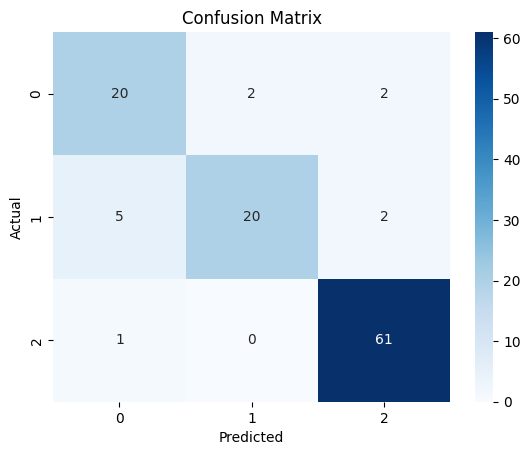

In [ ]:
!pip install catboost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

from catboost import CatBoostClassifier

# 📥 Load Data
df = pd.read_csv('/content/drive/My Drive/Sleep_health_and_lifestyle_dataset.csv')

# Preprocess
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['BMI Category'] = le.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = le.fit_transform(df['Sleep Disorder'].astype(str))  # Target

# Blood Pressure split
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic BP'] = pd.to_numeric(df['Systolic BP'])
df['Diastolic BP'] = pd.to_numeric(df['Diastolic BP'])
df.drop('Blood Pressure', axis=1, inplace=True)

# Feature Engineering
df['Activity_Sleep_Ratio'] = df['Daily Steps'] / df['Sleep Duration']
df['Stress_Sleep_Ratio'] = df['Stress Level'] / df['Sleep Duration']

# Features + Target
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

# Scale
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ✅ Train CatBoost
model = CatBoostClassifier(verbose=0, iterations=500, learning_rate=0.03, depth=6)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ CatBoost Test Accuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


11.Sleep Disorder Detection Using 1D Convolutional Neural Networks with Feature Engineering and Evaluation Metrics

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 190ms/step - accuracy: 0.4370 - loss: 1.6653 - val_accuracy: 0.6226 - val_loss: 1.0385 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5805 - loss: 0.9744 - val_accuracy: 0.6981 - val_loss: 0.9681 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7578 - loss: 0.5969 - val_accuracy: 0.7547 - val_loss: 0.9037 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8344 - loss: 0.4762 - val_accuracy: 0.9057 - val_loss: 0.8524 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8237 - loss: 0.5192 - val_accuracy: 0.9057 - val_loss: 0.8105 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8282 - loss: 0.4500 - val_accuracy: 0.9057 - val_loss: 0.7757 - learning_rate: 0.0010
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8719 - loss: 0.4216 - val_accuracy: 0.

1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 411ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        24
           1       0.95      0.70      0.81        27
           2       0.94      0.95      0.94        62

    accuracy                           0.88       113
   macro avg       0.86      0.84      0.84       113
weighted avg       0.89      0.88      0.88       113



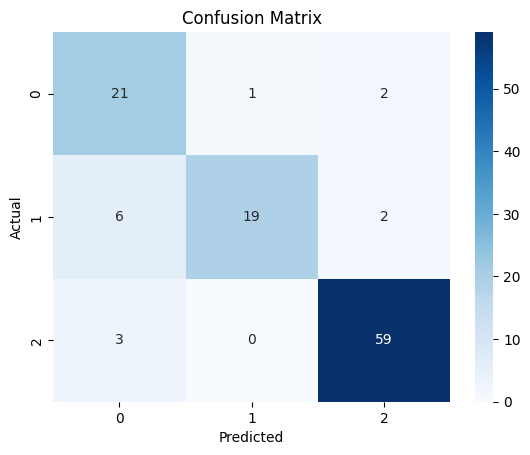

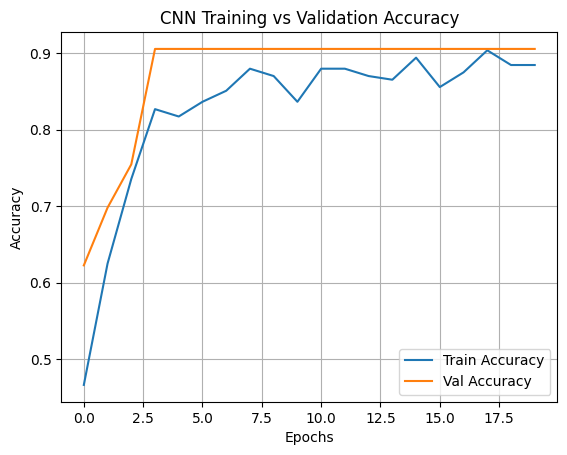

In [ ]:
# 📚 Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 📥 Load Data
df = pd.read_csv('/content/drive/My Drive/Sleep_health_and_lifestyle_dataset.csv')

# 🧼 Preprocessing
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['BMI Category'] = le.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = le.fit_transform(df['Sleep Disorder'].astype(str))  # Target

# Split Blood Pressure
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic BP'] = pd.to_numeric(df['Systolic BP'])
df['Diastolic BP'] = pd.to_numeric(df['Diastolic BP'])
df.drop('Blood Pressure', axis=1, inplace=True)

# ➕ Feature Engineering
df['Activity_Sleep_Ratio'] = df['Daily Steps'] / df['Sleep Duration']
df['Stress_Sleep_Ratio'] = df['Stress Level'] / df['Sleep Duration']

# 🎯 Features and Target
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

# 🔁 Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🎯 One-hot encode target
y_cat = to_categorical(y)

# 🧪 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.3, random_state=42)

# 👷 Reshape for 1D CNN (samples, timesteps, features)
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 🧠 CNN Model
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y_cat.shape[1], activation='softmax'))

# ⚙️ Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ⏱️ Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# 🚀 Train
history = model.fit(
    X_train_cnn, y_train,
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# ✅ Evaluate
loss, accuracy = model.evaluate(X_test_cnn, y_test)
print(f"\n✅ CNN Test Accuracy: {accuracy:.4f}")

# 🔍 Predictions
y_pred = model.predict(X_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\n🧾 Classification Report:")
print(classification_report(y_true, y_pred_classes))

# 🔲 Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 📈 Accuracy Curve
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("CNN Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


12.Sleep Disorder Classification Using XGBoost with Health and Lifestyle Features

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 🔄 Convert categorical target back to labels
y_labels = np.argmax(y_cat, axis=1)

# 🚀 Train-Test Split (again, for sklearn)
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_scaled, y_labels, test_size=0.3, random_state=42)

# 🎯 XGBoost Classifier
model = xgb.XGBClassifier(n_estimators=200, max_depth=8, learning_rate=0.05, subsample=0.9, colsample_bytree=0.9, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train_xgb, y_train_xgb)

# 📊 Evaluate
y_pred = model.predict(X_test_xgb)
print(f"\n✅ XGBoost Accuracy: {accuracy_score(y_test_xgb, y_pred):.4f}")
print("\n🧾 Classification Report:\n", classification_report(y_test_xgb, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:15:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



✅ XGBoost Accuracy: 0.9027

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.82        24
           1       0.91      0.74      0.82        27
           2       0.95      0.98      0.97        62

    accuracy                           0.90       113
   macro avg       0.88      0.87      0.87       113
weighted avg       0.91      0.90      0.90       113



In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
# Install catboost if not already installed
try:
    from catboost import CatBoostClassifier
except ImportError:
    !pip install catboost
    from catboost import CatBoostClassifier


# Manual mappings (should match training)
gender_map = {"Male": 1, "Female": 0}
occupation_map = {
    "Doctor": 0, "Engineer": 1, "Lawyer": 2, "Nurse": 3,
    "Teacher": 4, "Accountant": 5, "Salesperson": 6, "Software Engineer": 7,
    "Scientist": 8, "Police Officer": 9, "Artist": 10, "Other": 11
}
bmi_map = {"Normal": 0, "Overweight": 1, "Obese": 2, "Underweight": 3}
bp_category_map = {
    "Normal": (90, 120, 60, 80),
    "High": (140, 180, 90, 120),
    "Low": (70, 90, 40, 60)
}

def get_bp_values(bp_category):
    if bp_category in bp_category_map:
        sys_range, dias_range = bp_category_map[bp_category][:2], bp_category_map[bp_category][2:]
        return (sys_range[0] + sys_range[1]) / 2, (dias_range[0] + dias_range[1]) / 2
    return np.nan, np.nan

def get_user_input():
    print("🔍 Please enter the following details:")
    gender = input("Gender (Male/Female): ")
    age = int(input("Age: "))
    occupation = input("Occupation: ")
    sleep_duration = float(input("Sleep Duration (hours): "))
    quality_of_sleep = int(input("Quality of Sleep (1-10): "))
    physical_activity = int(input("Physical Activity Level (1-10): "))
    stress_level = int(input("Stress Level (1-10): "))
    bmi = input("BMI Category (Normal/Overweight/Obese/Underweight): ")
    bp_category = input("Blood Pressure Category (Normal/High/Low): ")
    heart_rate = int(input("Heart Rate: "))
    steps = int(input("Daily Steps: "))

    try:
        gender_encoded = gender_map.get(gender, -1)
        occupation_encoded = occupation_map.get(occupation, -1)
        bmi_encoded = bmi_map.get(bmi, -1)
        systolic_bp, diastolic_bp = get_bp_values(bp_category)

        activity_sleep_ratio = steps / sleep_duration if sleep_duration != 0 else 0
        stress_sleep_ratio = stress_level / sleep_duration if sleep_duration != 0 else 0

        row = [
            1,  # Dummy Person ID
            gender_encoded,
            age,
            occupation_encoded,
            sleep_duration,
            quality_of_sleep,
            physical_activity,
            stress_level,
            bmi_encoded,
            heart_rate,
            steps,
            systolic_bp,
            diastolic_bp,
            activity_sleep_ratio,
            stress_sleep_ratio
        ]

        user_df = pd.DataFrame([row], columns=[
            'Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
            'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
            'Daily Steps', 'Systolic BP', 'Diastolic BP', 'Activity_Sleep_Ratio', 'Stress_Sleep_Ratio'
        ])
    except Exception as e:
        print(f"❌ Invalid input: {e}")
        return None
    return user_df

# Predict and display
user_data_df = get_user_input()
if user_data_df is not None:
    try:
        # 🔄 Apply same scaler as training
        user_data_scaled = scaler.transform(user_data_df)

        # ✅ Predict based on model type
        if isinstance(model, tf.keras.models.Sequential):
            # LSTM needs 3D input: (samples, timesteps, features)
            user_data_scaled = user_data_scaled.reshape((user_data_scaled.shape[0], user_data_scaled.shape[1], 1))
            prediction = model.predict(user_data_scaled)
            sleep_disorder_encoded = np.argmax(prediction, axis=1)[0]

        elif isinstance(model, (CatBoostClassifier, RandomForestClassifier, xgb.XGBClassifier)):
            prediction = model.predict(user_data_scaled)
            sleep_disorder_encoded = prediction[0]

        else:
            print("⚠️ Unknown model type. Assuming direct class prediction.")
            prediction = model.predict(user_data_scaled)
            sleep_disorder_encoded = prediction[0]

        # 🧠 Decode label
        sleep_disorder = le.inverse_transform([sleep_disorder_encoded])[0]
        print(f"\n🛌 Predicted Sleep Disorder: **{sleep_disorder}**")

    except NameError:
        print("❌ Model or LabelEncoder 'le' not defined. Please train the model first.")
    except Exception as e:
        print(f"❌ An error occurred during prediction: {e}")

🔍 Please enter the following details:
Gender (Male/Female): Male
Age: 45
Occupation: Doctor
Sleep Duration (hours): 6.5
Quality of Sleep (1-10): 6
Physical Activity Level (1-10): 75
Stress Level (1-10): 6
BMI Category (Normal/Overweight/Obese/Underweight): Normal
Blood Pressure Category (Normal/High/Low): 120/80
Heart Rate: 70
Daily Steps: 8000
❌ Model or LabelEncoder 'le' not defined. Please train the model first.


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)  # Or whatever your training data variable is


StandardScaler()

In [ ]:
import joblib
joblib.dump(scaler, "scaler.pkl")



['scaler.pkl']

In [ ]:
from google.colab import files
files.download("scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(X_train.columns.tolist())


AttributeError: 'numpy.ndarray' object has no attribute 'columns'